In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [2]:
df = pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")
df.shape

(51717, 17)

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df = df.drop(["url", "address", "phone", "dish_liked", "reviews_list", "menu_item"], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [10]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
def newrate(val):
    if val=="NEW" or val=="-":
        return np.nan
    else:
        val = str(val).split('/')
        val = val[0]
        return float(val)

In [13]:
df['rate'] = df['rate'].apply(newrate)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         41590 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [15]:
df['rate'].isnull().sum()

10019

Filling the nan value in the rate column

In [16]:
df['rate'].fillna(df['rate'].mean(), inplace=True)
df["rate"].isnull().sum()

0

In [17]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

Droped null value row from location, rest_type, cuisines, approx_cost(for two people). Since the column doesn't have many null values

In [18]:
df.dropna(inplace = True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

Removed all the null values

Now rename the columns

In [19]:
df.rename(columns={'approx_cost(for two people)':'Cost2People', 'listed_in(type)':'Type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2People,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


There are two 2 columns which contain name of the location

In [20]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [21]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Both the column have same purpose. Hence we can drop one column.

In [22]:
df = df.drop(['listed_in(city)'], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2People,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [23]:
df.shape

(51042, 10)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   Cost2People   51042 non-null  object 
 9   Type          51042 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [26]:
df['Cost2People'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [27]:
np.dtype(df['Cost2People'])

dtype('O')

Cost2People column should be of integer datatype but instead of it shows object datatype column because the column has values with commas

Now removing commas to convert the column to integer.

In [28]:
def handlecomma(val):
    val = str(val)
    val = val.replace(',','')
    return int(val)

In [29]:
df['Cost2People'] = df['Cost2People'].apply(handlecomma)

In [30]:
df.Cost2People.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   Cost2People   51042 non-null  int64  
 9   Type          51042 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.3+ MB


In [32]:
df["rest_type"].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

Now we are adding the types containing less than 1000 restaurants in others for simplicity purpose.

In [33]:
rest_types = df["rest_type"].value_counts(ascending=False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [34]:
rest_types_lessThan500 = rest_types[rest_types<500]
rest_types_lessThan500

rest_type
Sweet Shop                    468
Bar, Casual Dining            411
Lounge                        395
Pub                           355
Fine Dining                   345
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 82, dtype: int64

Now let's add the rest types less than thousand in others.

In [36]:
def addInOthers(val):
    if val in rest_types_lessThan500:
        return "others"
    else:
        return val

In [37]:
df["rest_type"] = df["rest_type"].apply(addInOthers)

In [38]:
df["rest_type"].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 6838
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Beverage Shop           863
Bar                     686
Food Court              616
Name: count, dtype: int64

In [39]:
df.tail()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2People,Type
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1500,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,2000,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars
51716,The Nest - The Den Bengaluru,No,No,3.400000,13,"ITPL Main Road, Whitefield",others,"Finger Food, North Indian, Continental",1500,Pubs and bars


In [40]:
df.location.value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [41]:
location = df.location.value_counts(ascending = False)
loc_lessthan100 = location[location<200]

def handle_loc(val):
    if val in loc_lessthan100:
        return 'others'
    else:
        return val

In [43]:
df.location = df['location'].apply(handle_loc)

In [44]:
df.location.value_counts()

location
BTM                      5056
others                   3402
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [45]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2People,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [46]:
df.cuisines.value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [48]:
cuisines = df.cuisines.value_counts(ascending=False)
cuisines_lessthan100 = cuisines[cuisines<100]

In [50]:
def handle_cuisine(val):
    if val in cuisines_lessthan100:
        return 'others'
    else:
        return val

In [51]:
df.cuisines = df['cuisines'].apply(handle_cuisine)

In [52]:
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [53]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2People,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


In [54]:
df.Type.value_counts()

Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

Data Viualzation

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

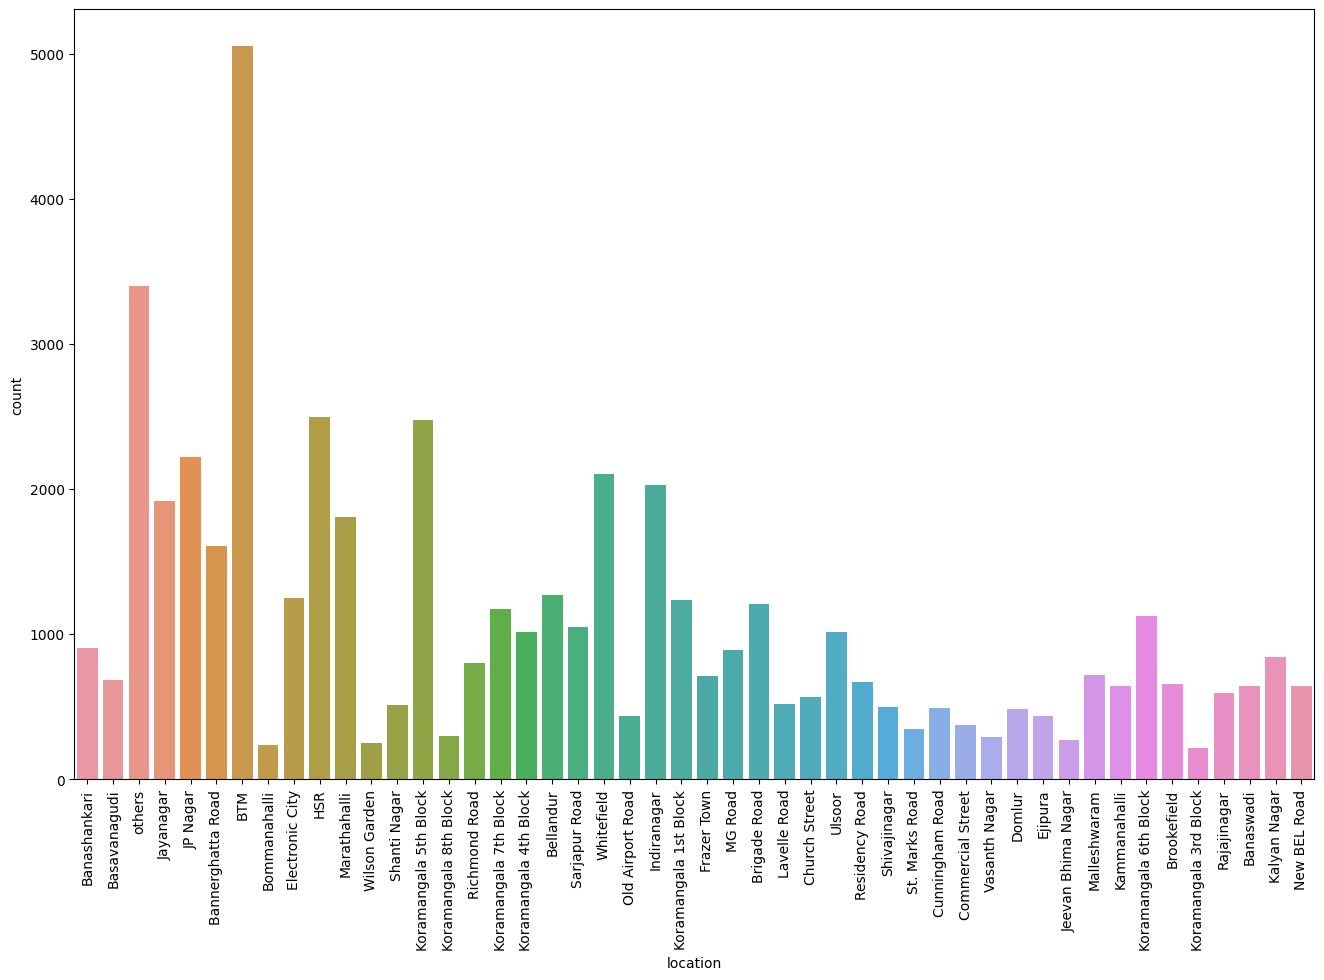

In [56]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x=df["location"])
plt.xticks(rotation=90)
plt.show()

Insight for the above visualization is maxmuim restaurants are present in BTM location

So if anyone wants to build a hotel it should be built in areas that have less number of hotels like Vasanth nagar, Bhima nagar

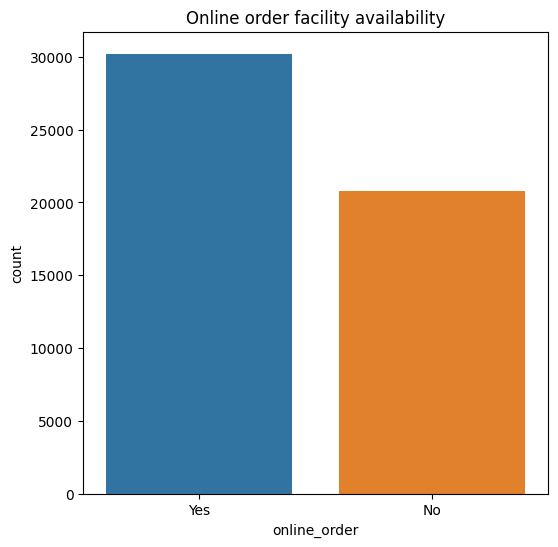

In [58]:
#Visualizing online order
plt.figure(figsize=(6,6))
ax = sns.countplot(x = df['online_order'])
plt.title("Online order facility availability")
plt.show()

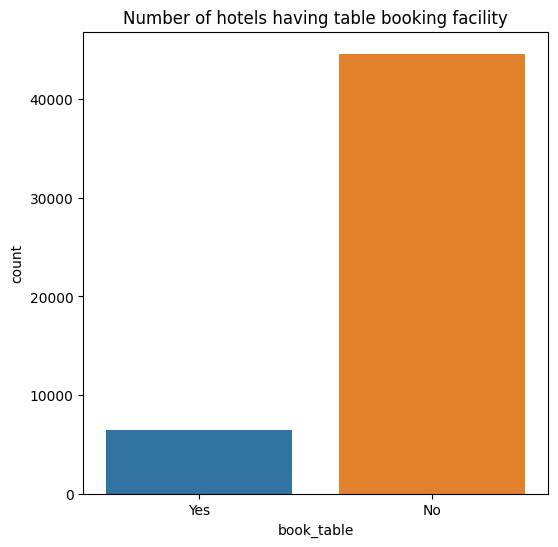

In [59]:
#Visualizing book table
plt.figure(figsize=(6,6))
sns.countplot(x=df['book_table'])
plt.title("Number of hotels having table booking facility")
plt.show()

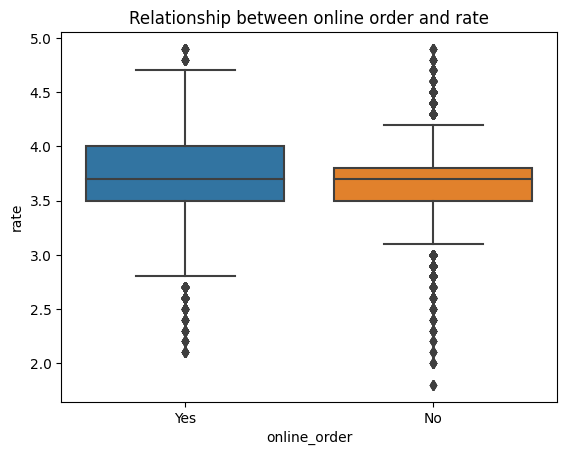

In [60]:
#visualizing mode of order vs rate
plt.figure()
sns.boxplot(x=df['online_order'],y=df['rate'])
plt.title("Relationship between online order and rate")
plt.show()

Insight form above visualization is rate is higher for the hotels having book table facility

Text(0.5, 1.0, 'Relationship between book table and rate')

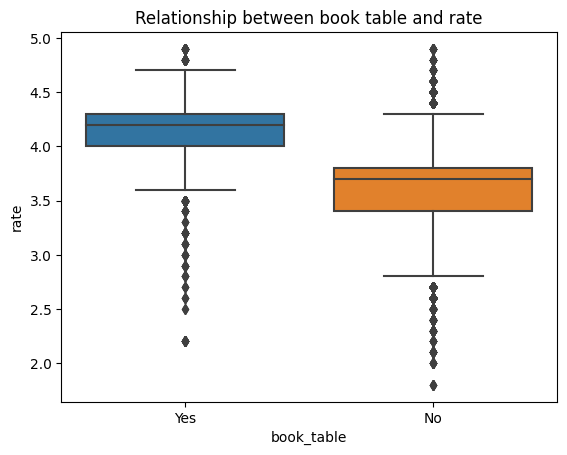

In [61]:
plt.figure()
sns.boxplot(x=df['book_table'],y=df['rate'])
plt.title("Relationship between book table and rate")

In [62]:
df1=df.groupby(['location','online_order'])['name'].count()
df1

location       online_order
BTM            No              1763
               Yes             3293
Banashankari   No               397
               Yes              505
Banaswadi      No               302
                               ... 
Whitefield     Yes             1119
Wilson Garden  No               112
               Yes              134
others         No              1444
               Yes             1958
Name: name, Length: 96, dtype: int64

In [63]:
df1.to_csv('loc_online_order.csv')
df1 = pd.read_csv('loc_online_order.csv')

In [64]:
df1 = pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],
                     fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Bommanahalli            121   115
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Jeevan Bhima Nagar       68   200
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 3rd Block    91   124
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Koramangala 8th Block    82   212
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Vasanth Nagar           146   147
Whitefield              986  1119
Wilson Garden           112   134
others                 1444  1958

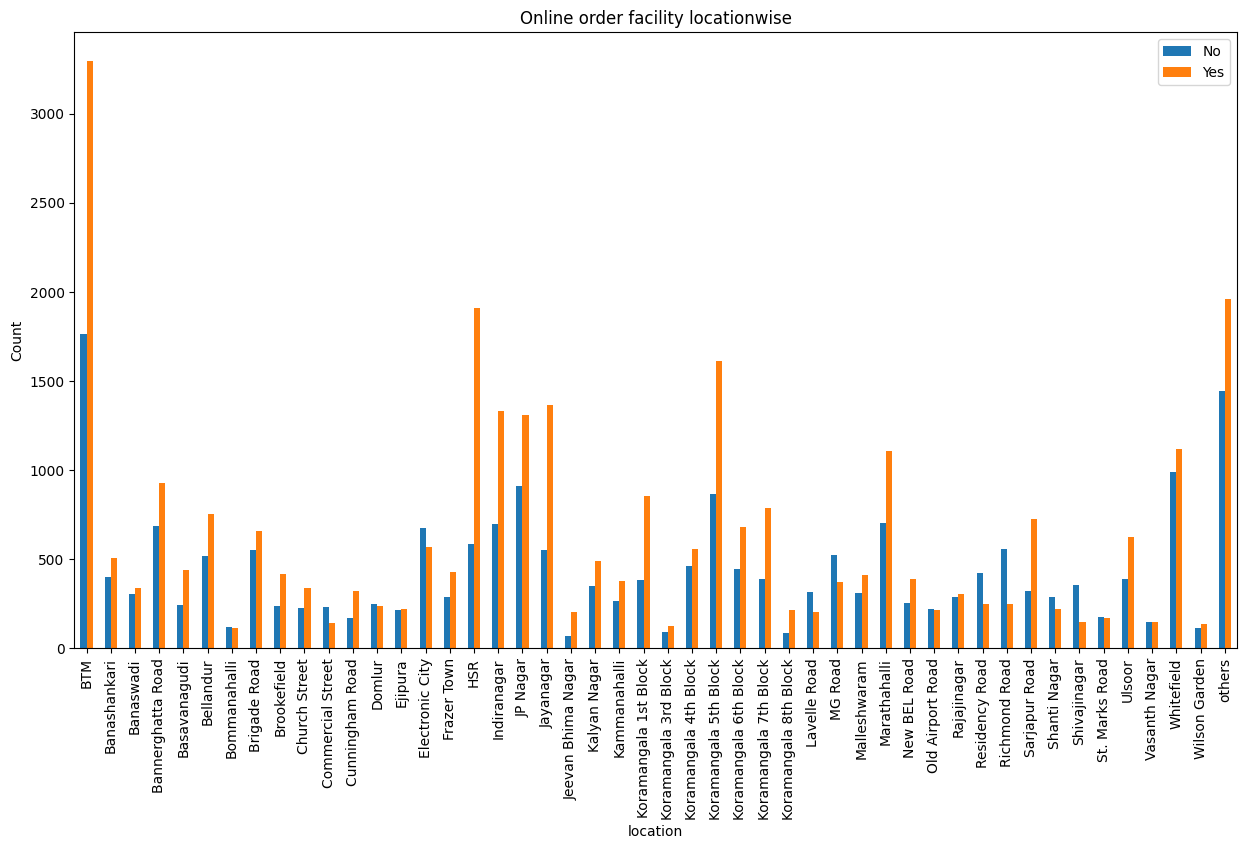

In [65]:
df1.plot(kind="bar", figsize=(15,8))
plt.legend(["No", "Yes"])
plt.ylabel('Count')
plt.title('Online order facility locationwise');

Here we can see that if anyone wants to start an online order service, one has to start it where the online order facility is least available


In [66]:
#Visualizing book table facility locationwise 
df2 = df.groupby(['location','book_table'])['name'].count()
df2

location       book_table
BTM            No            4889
               Yes            167
Banashankari   No             839
               Yes             63
Banaswadi      No             632
                             ... 
Whitefield     Yes            253
Wilson Garden  No             241
               Yes              5
others         No            3190
               Yes            212
Name: name, Length: 94, dtype: int64

In [67]:
df2.to_csv('loc_booktable.csv')
df2 = pd.read_csv('loc_booktable.csv')
df2=pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'],
                  aggfunc=np.sum,fill_value=0)

In [68]:
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Bommanahalli            233    3
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Jeevan Bhima Nagar      264    4
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 3rd Block   106  109
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Koramangala 8th Block   277   17
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Vasanth Nagar           276   17
Whitefield             1852  253
Wilson Garden           241    5
others                 3190  212

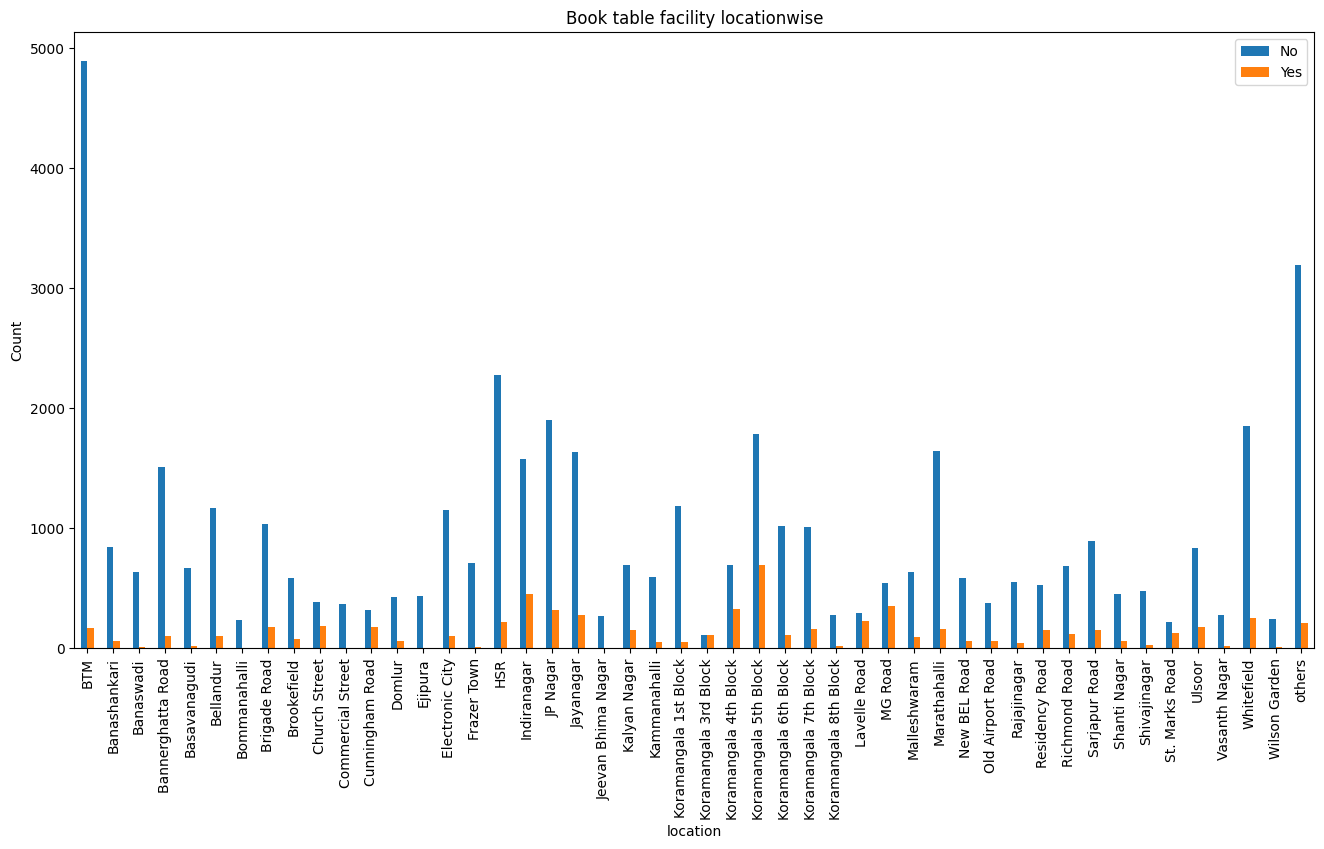

In [69]:
df2.plot(kind='bar',figsize=(16,8))
plt.legend(["No", "Yes"])
plt.ylabel('Count');
plt.title('Book table facility locationwise');

Here we can see that if anyone wants to start a hotel with table booking facility it should be started in the areas where this facility is least available

In [70]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2People,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


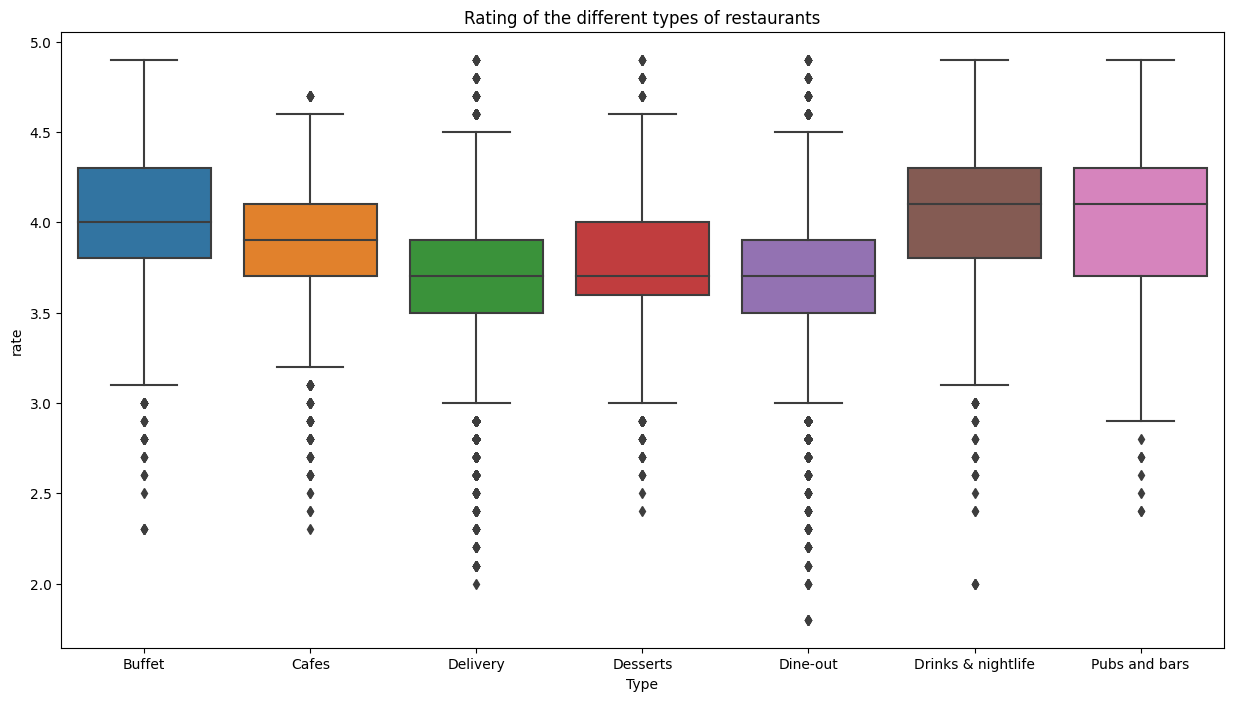

In [71]:
#Visualizing types of restaurants vs rate
plt.figure(figsize=(15,8))
sns.boxplot(data= df,x =df['Type'],y=df['rate'])
plt.xlabel='Type'
plt.ylabel='rate'
plt.title('Rating of the different types of restaurants');

In [72]:
#Group types of restaurants locationwise
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('loc_type.csv')
df3 = pd.read_csv('loc_type.csv')
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['Type'],
                  aggfunc=np.sum, fill_value=0)

In [73]:
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Bommanahalli               2     1      145       11       75   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Jeevan Bhima Nagar         0     6      139       18      105   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 3rd Block     19    20       81       17       65   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Koramangala 8th Block      0    10      199       24       59   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Vasanth Nagar              4    16      152       12      104   
Whitefield                28    51     1041      137      768   
Wilson Garden              3     2      133       19       86   
others                    55    78     1938      175     1059   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Bommanahalli                           1             1  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street           

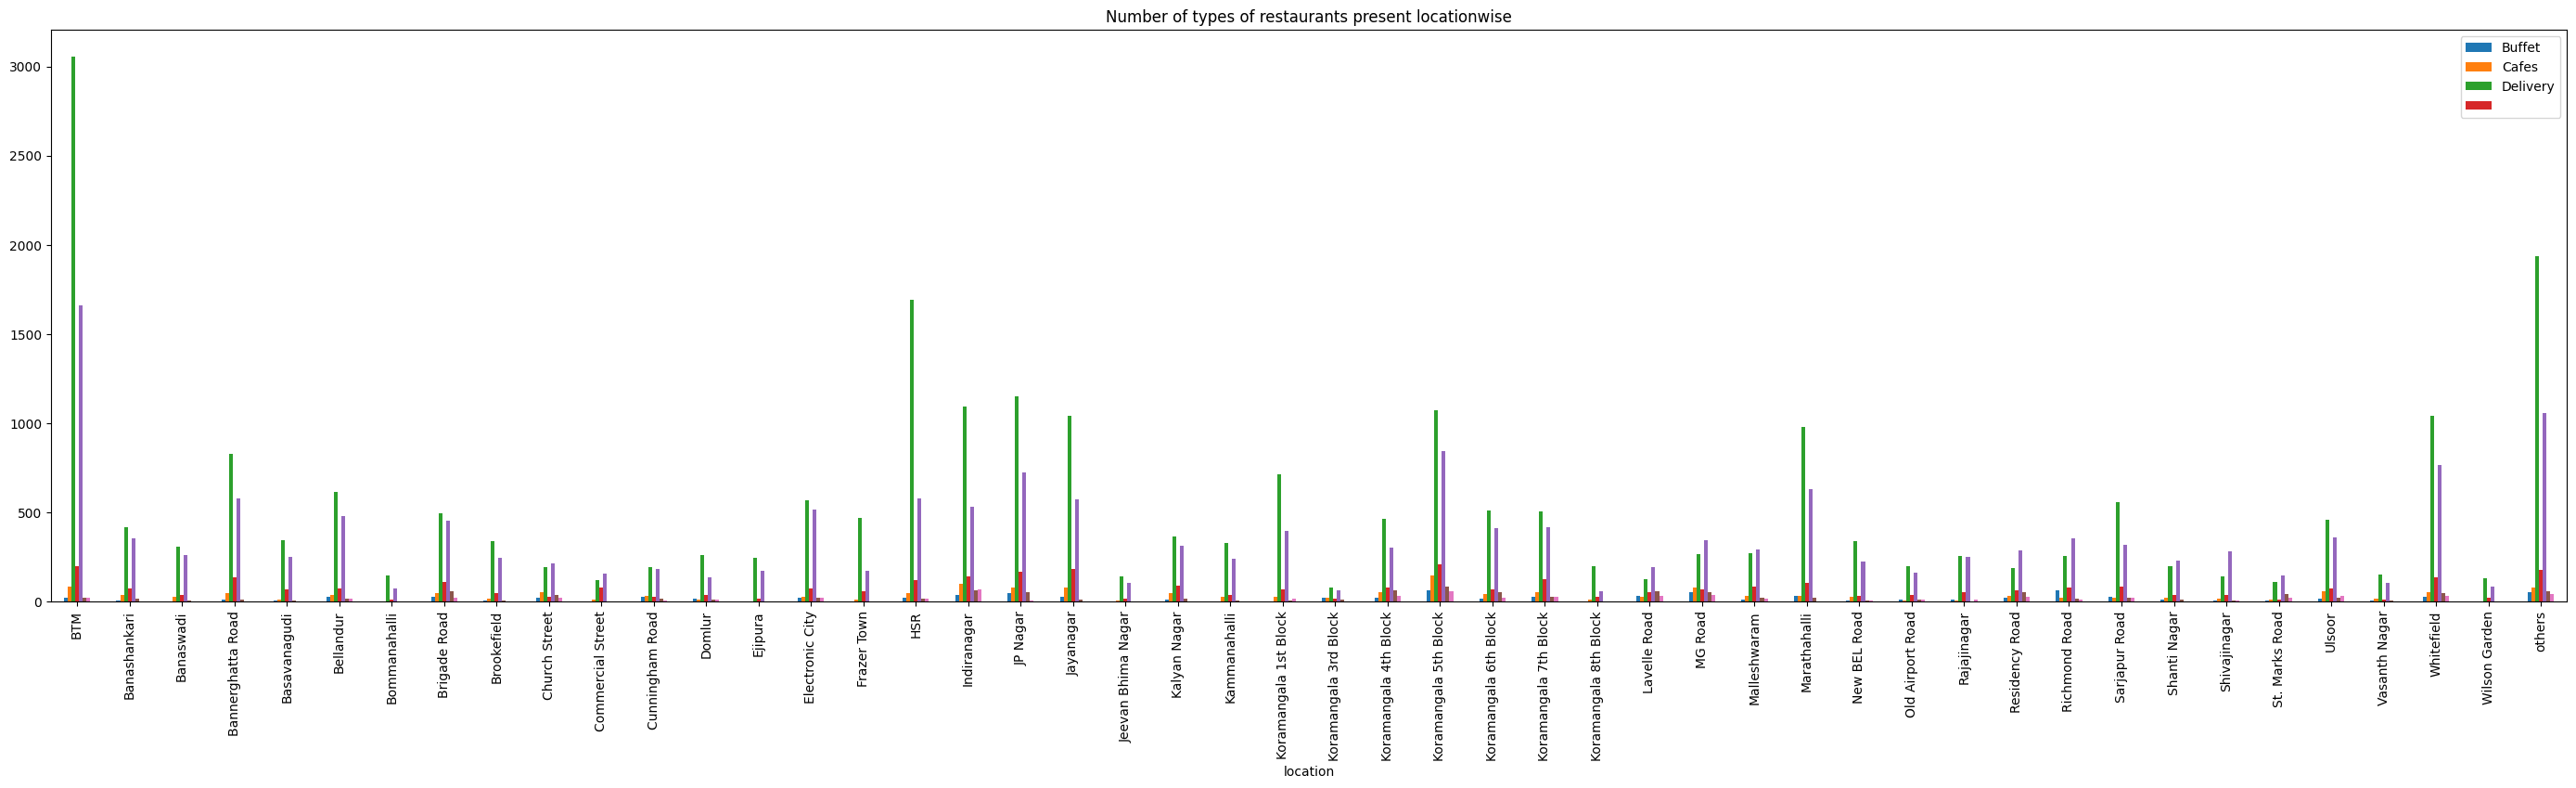

In [74]:
df3.plot(kind='bar',figsize=(35,8))
plt.legend(["Buffet", "Cafes","Delivery",""])
#plt.ylabel('Count')
plt.title('Number of types of restaurants present locationwise');

So we can select the type of restaurant we need to start in a location